<a href="https://colab.research.google.com/github/dave502/course.numpy-pandas/blob/main/homework_03/hw6_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Задание 2


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston["data"], columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression

In [ ]:
model.fit(X_train, y_train.values[:, 0])
y_pred = model.predict(X_test)

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

In [ ]:
r2_score(y_test["price"], y_pred.flatten())

0.8749965273218174

**У модели RandomForestRegressor результат предсказания значительно выше, чем у модели LinearRegression**

##Задание 3

Вызовите документацию для класса RandomForestRegressor,

In [ ]:
from sklearn.ensemble import RandomForestRegressor
help(RandomForestRegressor)

найдите информацию об атрибуте feature_importances_.

*| Data descriptors inherited from BaseForest: |
| feature_importances_ | Return the feature importances (the higher, the more important the | feature). |
| Returns | ------- | feature_importances_ : array, shape = [n_features] | The values of this array sum to 1, unless all trees are single node | trees consisting of only the root node, in which case it will be an | array of zeros*

С помощью этого атрибута найдите сумму всех показателей важности

In [ ]:
print("model.feature_importances_: {}".format(model.feature_importances_))
print('сумма всех показателей важности = {}'.format(sum(model.feature_importances_)))

model.feature_importances_: [0.03211748 0.00154999 0.0070941  0.0011488  0.01436832 0.40270459
 0.01424477 0.06403265 0.00496762 0.01169177 0.01808961 0.0123114
 0.41567892]
сумма всех показателей важности = 1.0


установите, какие два признака показывают наибольшую важность.


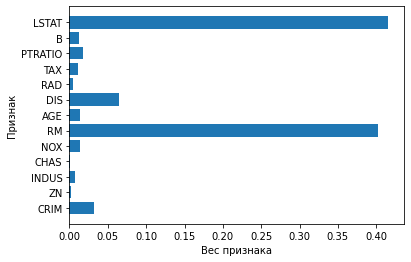

Два признака показывают наибольшую важность: [('LSTAT', 0.4156789214509943), ('RM', 0.402704591696731)]


In [ ]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 6, 4
%matplotlib inline

plt.barh(boston["feature_names"], model.feature_importances_)

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()
print("Два признака показывают наибольшую важность: {}".format(sorted(zip(boston["feature_names"], model.feature_importances_), key=lambda x: x[1], reverse=True)[0:2]))